In [80]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("FacebookSpamDataset.csv")

In [83]:
df.head(10)

,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.490000,0.550000,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.330000,0.960000,0.50,1.20,10,4,0
2,3,300,450,50,465,500,150,450,0.200000,0.840000,0.40,1.50,15,7,0
3,4,25,110,660,350,2050,2000,2050,0.975610,1.000000,0.70,0.30,54,21,1
4,5,24,100,150,800,950,1000,900,1.052632,0.947368,0.66,0.50,55,20,1
5,6,562,350,55,650,450,250,900,0.555556,2.000000,0.42,2.20,15,10,0
6,7,662,454,22,764,365,100,1000,0.273973,2.739726,0.31,2.50,23,10,0
7,8,50,100,700,350,2512,2000,2400,0.796178,0.955414,0.77,0.32,58,32,1
8,9,800,550,66,850,460,500,300,1.086957,0.652174,0.40,2.00,23,10,0
9,10,605,555,58,782,700,100,650,0.142857,0.928571,0.24,2.80,13,5,0


### Veri setinin genel özelliklerini 

In [85]:
total_data_points = len(df)
print(f"Toplam veri sayısı: {total_data_points}")

Toplam veri sayısı: 600


In [86]:
print("\nSütunlar:")
print(df.columns)


Sütunlar:
Index(['profile id', '#friends', '#following', '#community', 'age',
       '#postshared', '#urlshared', '#photos/videos', 'fpurls',
       'fpphotos/videos', 'avgcomment/post', 'likes/post', 'tags/post',
       '#tags/post', 'Label'],
      dtype='object')


In [87]:
print("\nBoş değerlerin sayısı her sütunda:")
print(df.isnull().sum())


Boş değerlerin sayısı her sütunda:
profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             2
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64


In [88]:
print("\nHer sütunun veri tipi:")
print(df.dtypes)


Her sütunun veri tipi:
profile id           int64
#friends             int64
#following           int64
#community           int64
age                  int64
#postshared          int64
#urlshared           int64
#photos/videos       int64
fpurls             float64
fpphotos/videos    float64
avgcomment/post    float64
likes/post         float64
tags/post            int64
#tags/post           int64
Label                int64
dtype: object


In [89]:
print("\nSayısal değişkenlerin istatistiksel özeti:")
print(df.describe())


Sayısal değişkenlerin istatistiksel özeti:
       profile id     #friends   #following   #community          age  \
count  600.000000   600.000000   600.000000   600.000000   600.000000   
mean   301.175000  1066.355000  1068.670000   207.646667  1214.605000   
std    173.729861   669.497972   677.262425   370.622053   471.261985   
min      1.000000     4.000000     1.000000    12.000000   125.000000   
25%    150.750000   663.500000   658.000000    39.000000   926.500000   
50%    301.500000  1159.000000  1132.000000    56.000000  1136.000000   
75%    451.250000  1473.750000  1473.750000    77.000000  1452.250000   
max    601.000000  5554.000000  5312.000000  1789.000000  2697.000000   

       #postshared   #urlshared  #photos/videos      fpurls  fpphotos/videos  \
count   600.000000   600.000000      600.000000  598.000000       600.000000   
mean   1158.115000   369.750000     1120.783333    0.187524         0.961135   
std     835.521159   720.084739      836.186049    0.25128

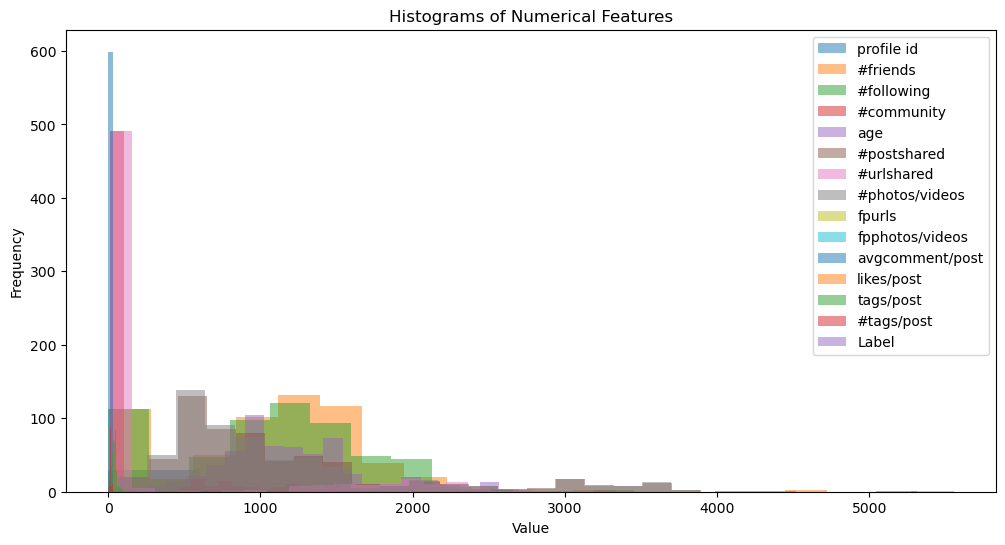

In [91]:
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.hist(df[col], bins=20, alpha=0.5, label=col)
plt.title('Histograms of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



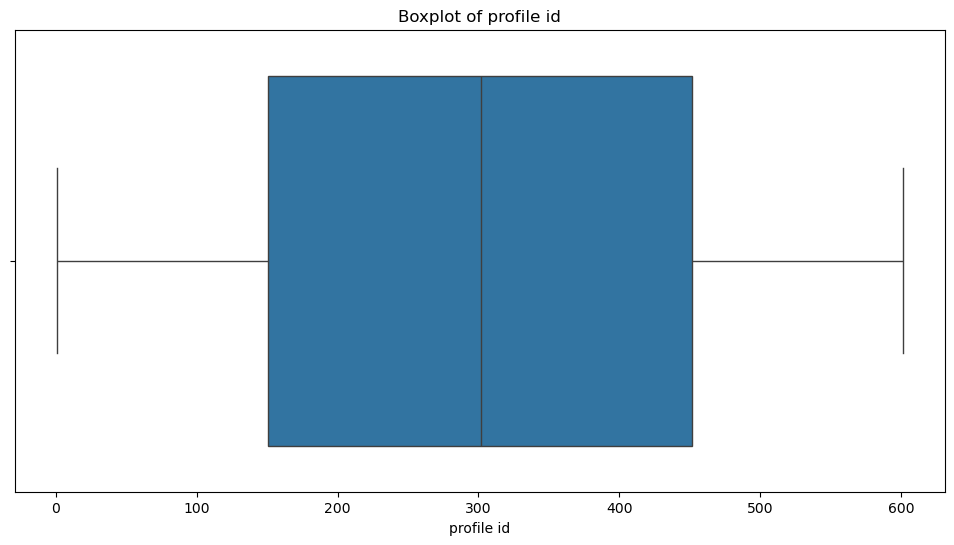

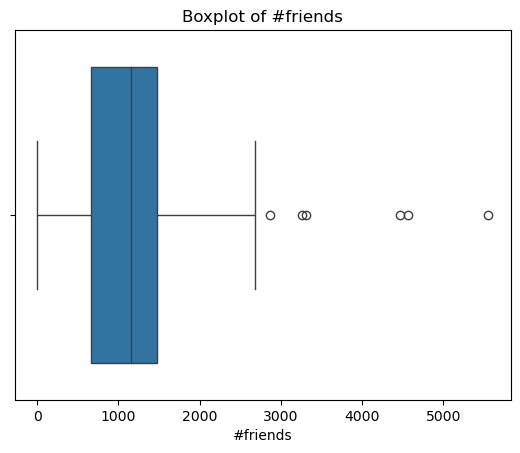

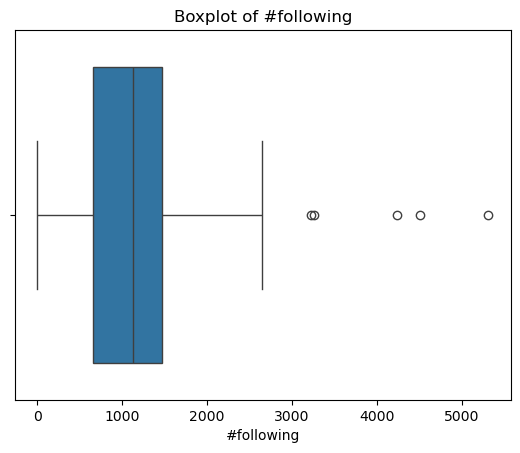

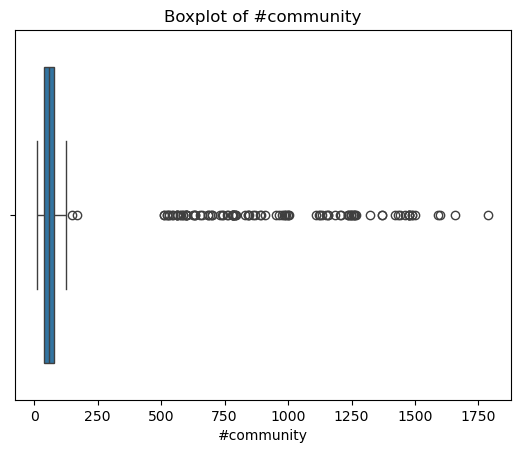

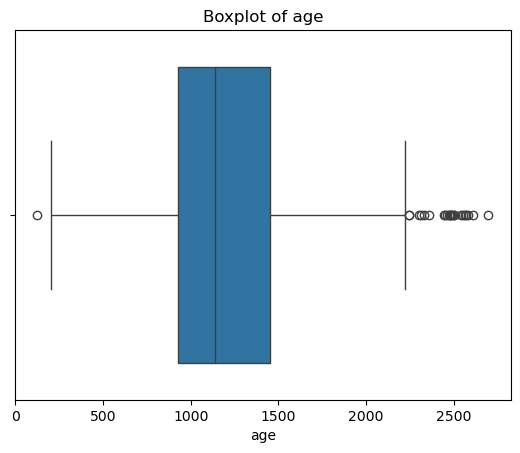

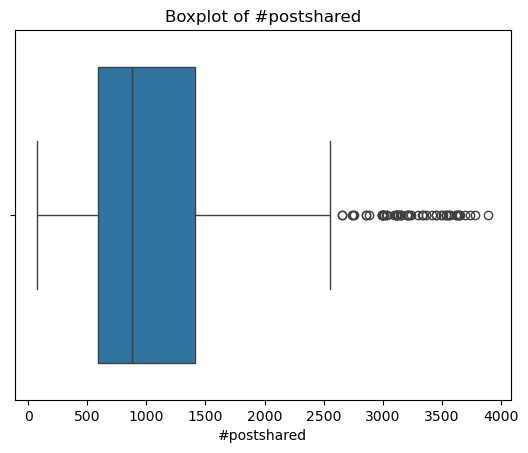

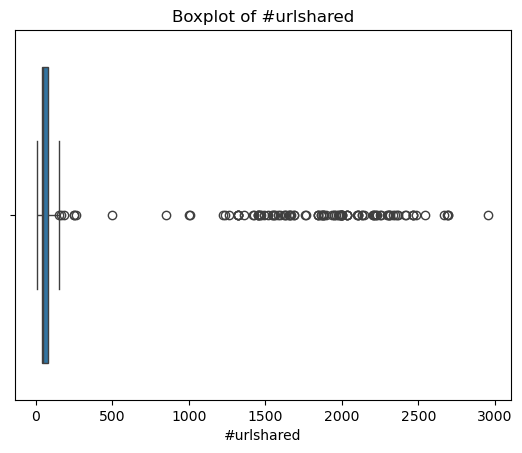

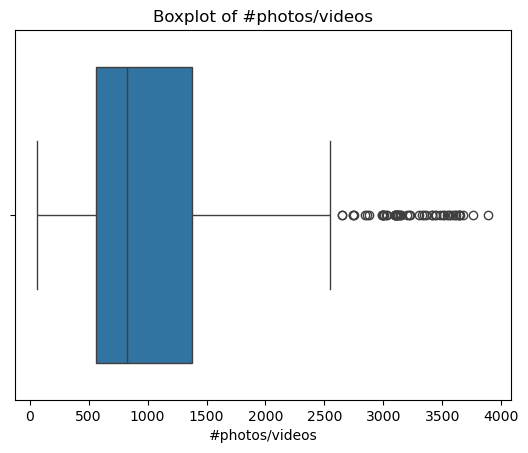

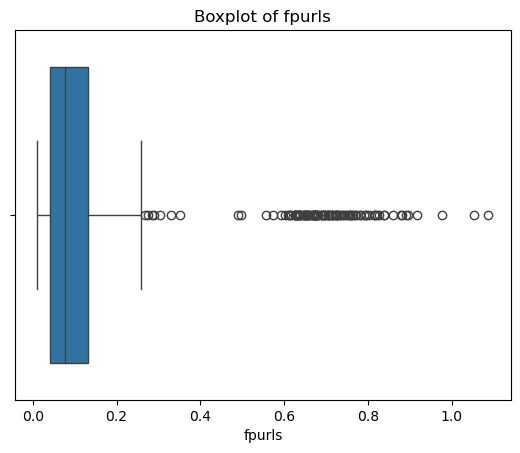

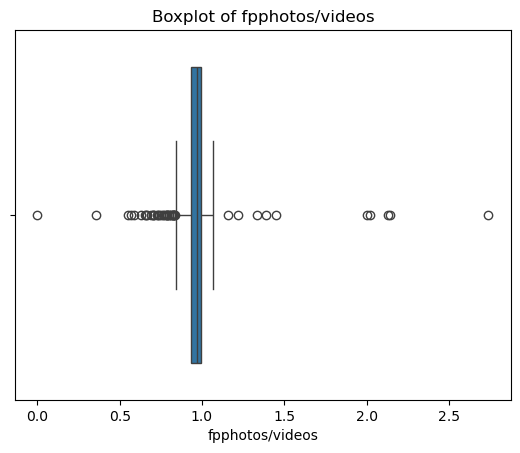

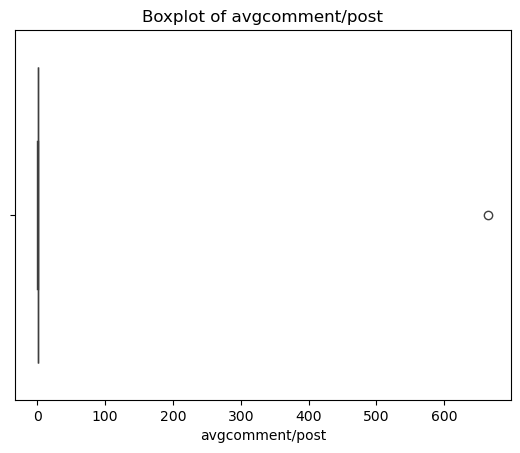

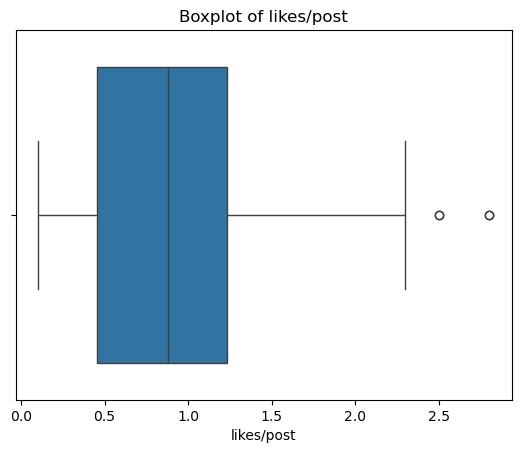

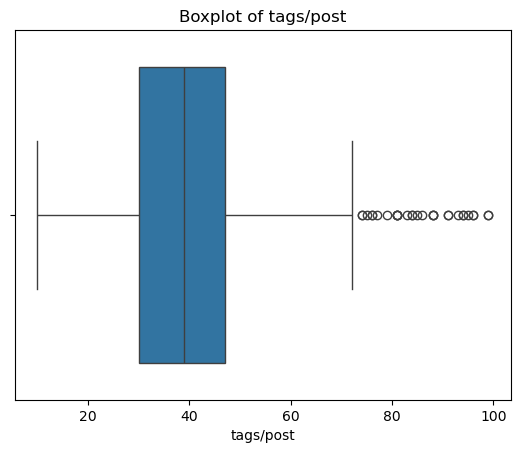

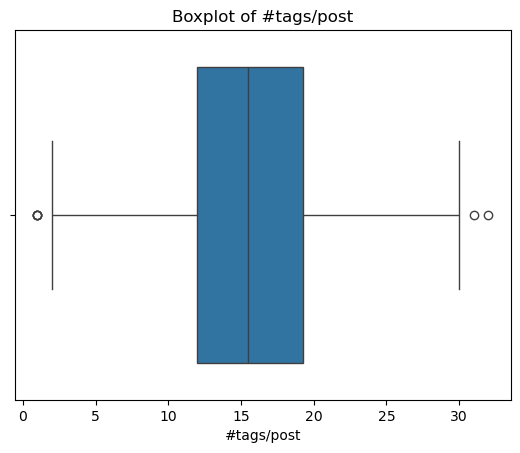

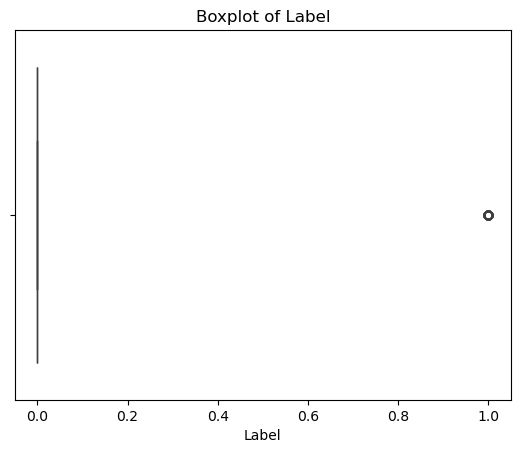

In [92]:
plt.figure(figsize=(12, 6))
for col in numerical_cols:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()



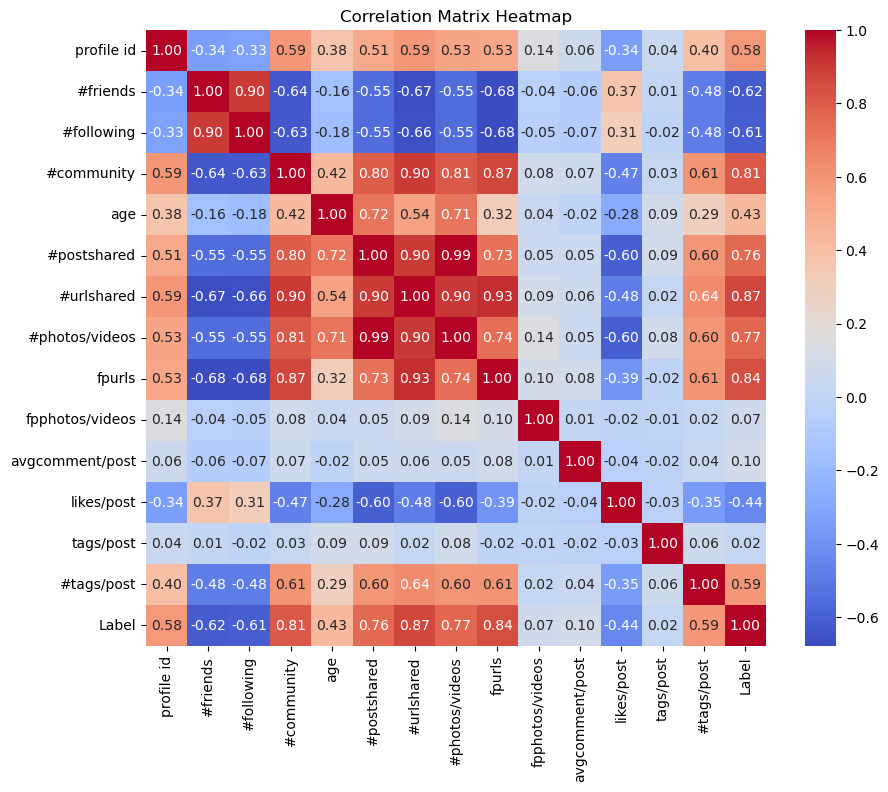

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()




### **Jaccard Similarity Ne İşe Yarar?**
İki küme arasındaki benzerliği niceliksel olarak ölçer.

Benzerlik ne kadar yüksekse, iki küme o kadar benzerdir.

Genellikle veri madenciliği, makine öğrenimi, öneri sistemleri ve metin analizi gibi alanlarda kullanılır.



### **Jaccard Similarity Nasıl Hesaplanır?**
Jaccard Similarity, aşağıdaki formülle hesaplanır:

Jaccard Similarity = |A ∩ B|/|A U B|


### **Jaccard Similarity Hangi Durumlarda Kullanılır?**
1. **Öneri Sistemleri:**
   
    Örneğin, iki kullanıcının satın aldığı ürünlerin benzerliğini ölçmek için kullanılır. Bu, "shared item purchase" (ortak ürün satın alma) senaryolarında kullanışlıdır.
   
    Müzik veya video platformlarında, kullanıcıların çalma listelerinin benzerliğine göre öneriler yapılabilir ("playlist recommendations").

2. **Metin Analizi:**
   
   İki metin belgesi arasındaki benzerliği ölçmek için kullanılır. Örneğin, kelime kümeleri karşılaştırılarak benzerlik hesaplanır.

3. **Biyoinformatik:**
   
   Genetik verilerde, gen kümelerinin benzerliğini ölçmek için kullanılır.

4. **Sosyal Ağ Analizi:**
   
   İki kullanıcının arkadaş listelerinin benzerliğini ölçmek için kullanılır.

5. **E-ticaret:**
   
   Müşterilerin satın alma alışkanlıklarını analiz etmek ve benzer ürünler önermek için kullanılır.


### **Jaccard Similarity'nin Avantajları ve Dezavantajları**
**Avantajları:**

Basit ve anlaşılır bir formüle sahiptir.

Kategorik verilerde etkilidir.

Küçük veri setlerinde hızlı çalışır.

**Dezavantajları:**

Kümelerin boyutu büyüdükçe hesaplama maliyeti artabilir.

Sadece kesişim ve birleşim bilgilerini kullanır; elemanların sıklığı veya ağırlığı gibi bilgileri dikkate almaz.



In [97]:
def jaccard_similarity(set1, set2):
  """Calculates the Jaccard similarity between two sets."""
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  if union == 0:
    return 0  
  return intersection / union

sample_rows = df.sample(3)

for i in range(3):
  for j in range(i + 1, 3):
    row1 = set(sample_rows.iloc[i].astype(str))  
    row2 = set(sample_rows.iloc[j].astype(str))
    similarity = jaccard_similarity(row1, row2)
    print(f"Satır {i+1} ve Satır {j+1} arasındaki Jaccard benzerliği: {similarity}")

Satır 1 ve Satır 2 arasındaki Jaccard benzerliği: 0.0
Satır 1 ve Satır 3 arasındaki Jaccard benzerliği: 0.034482758620689655
Satır 2 ve Satır 3 arasındaki Jaccard benzerliği: 0.0


# Content-Based Filtering

# Teknik Açıklaması:

İçerik tabanlı filtreleme, kullanıcının daha önce beğendiği veya etkileşimde bulunduğu öğelere benzer öğeleri öneren bir öneri sistemidir.

Öğelerin özelliklerine dayanarak benzerlik hesaplanır.  Örneğin, bir film için özellik olarak türü, yönetmeni, oyuncuları ve konusu kullanılabilir.

# Nasıl Çalışır?

1. Öğe Profilleri Oluşturma: Her öğe için bir özellik vektörü oluşturulur. Bu vektör, öğenin ilgili özelliklerini temsil eder.

2. Kullanıcı Profilleri Oluşturma: Kullanıcının etkileşimde bulunduğu öğelerin özellik vektörleri kullanılarak kullanıcı profili oluşturulur. Bu, kullanıcının ilgi alanlarını temsil eder.

3. Benzerlik Ölçümü: Kullanıcı profili ile diğer öğelerin özellik vektörleri arasındaki benzerlik hesaplanır.  Cosine benzerliği, Pearson korelasyonu veya Jaccard benzerliği gibi çeşitli benzerlik ölçütleri kullanılabilir.

4. Öneri Yapma: En yüksek benzerliğe sahip öğeler kullanıcıya önerilir.

# Örnek Kullanım Alanı:

Öneri sistemleri, özellikle ürün, film, müzik veya haber önerilerinde yaygın olarak kullanılır.

Örneğin, bir kullanıcı bir e-ticaret sitesinde belli bir ürünü satın alırsa, sistem benzer özelliklere sahip ürünleri (renk, marka, kategori) önerir.

Bu teknik, kullanıcının geçmiş davranışlarına dayanarak kişiselleştirilmiş öneriler sağlar.




=> Proje, Facebook spam verilerini analiz ederek spam mesajlarını tespit etmek ve benzerliklerine göre gruplandırmak için tasarlanmıştır.

=> Teknik olarak, projenin temelini Jaccard benzerliği hesaplamaları oluşturmaktadır.  Jaccard benzerliği, iki küme arasındaki benzerliği ölçen bir yöntemdir ve bu projede, mesajların özelliklerini (kelimeler, karakterler, vb.) temsil eden kümeler arasındaki benzerliği belirlemek için kullanılacaktır.  Bu benzerlik ölçütüne ek olarak, veri analizinde temel istatistiksel yöntemler (ortalama, standart sapma vb.) ve görselleştirme teknikleri (histogram, boxplot, heatmap vb.) kullanılacaktır.

=> Veri setinin konu içeriği ise Facebook'taki spam mesajlarıdır.  Proje, bu mesajların özelliklerini analiz ederek, spam mesajlarının karakteristik özelliklerini belirlemeyi amaçlamaktadır.  Bu özellikler daha sonra benzerlik indeksleri kullanılarak gruplandırılacak ve spam tespiti için bir model oluşturulmasında kullanılabilir.

=> Projenin nihai amacı, spam mesajlarının daha etkili bir şekilde tespiti için bir model oluşturmak ve bu model ile gelecekteki spam mesajlarını daha doğru bir şekilde sınıflandırmaktır.  Benzerlik indekslerinin kullanımı, spam mesajlarının gruplandırılması ve karakteristik özelliklerinin belirlenmesi konusunda önemli bir rol oynayacaktır. Bu da, spam filtreleme sistemlerinin geliştirilmesine ve kullanıcılara daha güvenli bir platform sunulmasına katkıda bulunacaktır.

### Önerici modelinizi oluşturun. Uygun bir yöntemle modeli eğitin ve değerlendirin.

In [103]:
file_path = "FacebookSpamDataset.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=['profile id', 'Label'])  
y = df['Label']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Model Değerlendirme Raporu:")
print(report)


Model Değerlendirme Raporu:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       149
           1       0.91      0.94      0.92        31

    accuracy                           0.97       180
   macro avg       0.95      0.96      0.95       180
weighted avg       0.97      0.97      0.97       180



### Modelinizin başarımını sayısal metriklerle ifade edin (örneğin: doğruluk, hata oranı, vb.).

In [105]:
accuracy = accuracy_score(y_test, y_pred)

error_rate = 1 - accuracy

f1 = f1_score(y_test, y_pred, average=None)  

precision = precision_score(y_test, y_pred, average=None)

recall = recall_score(y_test, y_pred, average=None)

print(f"Doğruluk (Accuracy): {accuracy:.2%}")
print(f"Hata Oranı (Error Rate): {error_rate:.2%}")
print(f"Sınıf 0 (Spam değil)   F1-Skoru: {f1[0]:.2f}")
print(f"Sınıf 1 (Spam)   F1-Skoru: {f1[1]:.2f}")
print(f"Sınıf 0 (Spam değil)   Precision: {precision[0]:.2f}")
print(f"Sınıf 1 (Spam)   Precision: {precision[1]:.2f}")
print(f"Sınıf 0 (Spam değil)   Recall: {recall[0]:.2f}")
print(f"Sınıf 1 (Spam)   Recall: {recall[1]:.2f}")


Doğruluk (Accuracy): 97.22%
Hata Oranı (Error Rate): 2.78%
Sınıf 0 (Spam değil)   F1-Skoru: 0.98
Sınıf 1 (Spam)   F1-Skoru: 0.92
Sınıf 0 (Spam değil)   Precision: 0.99
Sınıf 1 (Spam)   Precision: 0.91
Sınıf 0 (Spam değil)   Recall: 0.98
Sınıf 1 (Spam)   Recall: 0.94


### Örnek Öneriler: 3 farklı senaryo hazırlayın ve bu senaryolar doğrultusunda sisteminizin önerilerini açıklayın.

### **Senaryo 1: Düşük Etkileşimli Kullanıcı**
 **Kullanıcı Profili:**
    Arkadaş sayısı: 20
    Günlük ortalama paylaşım: 1
    Beğeni/Paylaşım oranı: 0.2
    Yorum/Paylaşım oranı: 0.1
    URL içerme oranı: %90
  **Model Önerisi:**  
Bu kullanıcının düşük arkadaş sayısı ve yüksek URL içerme oranı, spam profiline uygun görünüyor. Model, **"Spam"** olarak işaretler.
  **Gerekçe:**  
Spam kullanıcılar genelde düşük etkileşimli ve aşırı URL içeren içerikler paylaşır. Model bu tür kalıpları tespit ederek doğru bir öneri sunar.


### **Senaryo 2: Orta Etkileşimli Kullanıcı**
**Kullanıcı Profili:**
   Arkadaş sayısı: 150

  Günlük ortalama paylaşım: 5

   Beğeni/Paylaşım oranı: 2.5

   Yorum/Paylaşım oranı: 1.0

   URL içerme oranı: %50

**Model Önerisi:**  
Bu kullanıcı hem orta düzeyde etkileşimli hem de içeriklerinde dengeli bir URL oranına sahip. Model, **"Spam Değil"** olarak işaretler.

**Gerekçe:**  

Orta düzey etkileşim ve URL içerik oranı, tipik bir normal kullanıcının davranışına benzer. Bu kullanıcı spam davranışı göstermediği için öneri sistemi doğru sınıflandırma yapar.


### **Senaryo 3: Yüksek Etkileşimli ve Yoğun Paylaşım Yapan Kullanıcı**

**Kullanıcı Profili:**
  
  Arkadaş sayısı: 2000

  Günlük ortalama paylaşım: 50
  
   Beğeni/Paylaşım oranı: 0.1
  
   Yorum/Paylaşım oranı: 0.05
  
   URL içerme oranı: %95

 **Model Önerisi:**  

Bu kullanıcı yoğun paylaşım yapmasına rağmen beğeni ve yorum oranı düşük. URL içerme oranı da oldukça yüksek. Model, **"Spam"** olarak işaretler.

**Gerekçe:**  

Yoğun paylaşım ve düşük etkileşim oranı, genellikle spam kullanıcıların özelliklerini taşır. Model bu örüntüyü fark ederek doğru bir şekilde spam olarak önerir.


### **Sistem Önerilerini Açıklama:**
Modelimiz, kullanıcıların paylaşım ve etkileşim özelliklerini inceleyerek spam olup olmadıklarına dair öneriler sunar. Özellikle şu faktörler önemlidir:

URL içerme oranı

Günlük paylaşım sıklığı

Beğeni ve yorum oranları



### Sonuçlar ve Yorum: Çalışmanızın sonuçlarını kısaca özetleyin ve öneri sisteminin genel performansı hakkında yorum yapın.

Bu çalışmada Facebook kullanıcılarının verilerini kullanarak bir öneri sistemi geliştirdim. Amaç, spam kullanıcıları tespit etmekti. Model olarak Random Forest kullandım ve verileri hem eğitim hem test aşamasında değerlendirdim. 

Sonuçlara gelirsek, model %97 doğruluk oranına ulaştı. Spam olmayan kullanıcıları neredeyse hatasız bir şekilde doğru tahmin etti. Ancak spam kullanıcılar için hassasiyet biraz daha düşük (%91 civarında). Yine de bu sınıf için F1 skoru %92 oldu, yani fena değildi

Bazı eksikler de var tabii. Mesela veri setinde spam kullanıcı örnekleri daha az olduğu için modelin bu sınıfa odaklanması zor olmuş olabilir. Belki veri setini dengelersem ya da daha fazla spam örneğiyle çalışırsam sonuçlar daha da iyileşir. Bunun dışında farklı algoritmalar veya hiperparametre optimizasyonu deneyerek performansı artırabilirim.  

Genel olarak modelim iyi çalıştı.